<a href="https://colab.research.google.com/github/Behnam9473/AI/blob/main/ATI_CNN_CIFAR_10_Improved_Batch_Normalization_Data_Augmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
#Load data
cifar10 = tf.keras.datasets.cifar10

(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
xtrain, xtest = xtrain / 250.0, xtest / 255.0
ytrain, ytest = ytrain.flatten(), ytest.flatten()
print("xtrain shape is = ", xtrain.shape)
print("ytrain shape is = ", ytrain.shape)
print("xtest shape is = ", xtest.shape)
print("ytest shape is = ", ytest.shape)

xtrain shape is =  (50000, 32, 32, 3)
ytrain shape is =  (50000,)
xtest shape is =  (10000, 32, 32, 3)
ytest shape is =  (10000,)


In [ ]:
# number of classes
K = len(set(ytrain))
print("number of classes are = ", K)

print(xtrain[0].shape)

number of classes are =  10
(32, 32, 3)


In [ ]:
# Build the model
m = Input(shape = xtrain[0].shape)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(m)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(m)
x = BatchNormalization()(x)

x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)



x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(m, x)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(xtrain, ytrain, validation_data = (xtest, ytest),
                        epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 40s 25ms/step - loss: 2.0103 - accuracy: 0.4190 - val_loss: 1.3879 - val_accuracy: 0.5142
Epoch 2/20
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2208 - accuracy: 0.5711 - val_loss: 1.2509 - val_accuracy: 0.5413
Epoch 3/20
1563/1563 [==============================] - 40s 25ms/step - loss: 1.0307 - accuracy: 0.6440 - val_loss: 1.0104 - val_accuracy: 0.6554
Epoch 4/20
1563/1563 [==============================] - 40s 25ms/step - loss: 0.8927 - accuracy: 0.6920 - val_loss: 0.8771 - val_accuracy: 0.7105
Epoch 5/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7756 - accuracy: 0.7333 - val_loss: 0.7901 - val_accuracy: 0.7346
Epoch 6/20
1563/1563 [==============================] - 40s 25ms/step - loss: 0.6690 - accuracy: 0.7700 - val_loss: 0.9795 - val_accuracy: 0.6834
Epoch 7/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.5832 - accuracy: 0.7983 - val_loss: 0.8081 -

In [ ]:
#Data_Augmentaion
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(samplewise_std_normalization = False, width_shift_range = 0.2, height_shift_range = 0.1)
trainset_data_gen = data_gen.flow(xtrain, ytrain, 32)
step_epoch = xtrain.shape[0] // 32
r = model.fit_generator(trainset_data_gen, validation_data = (xtest, ytest), steps_per_epoch = step_epoch, epochs = 20)

Epoch 1/20


<ipython-input-48-bcc72f876d42>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(trainset_data_gen, validation_data = (xtest, ytest), steps_per_epoch = step_epoch, epochs = 20)


1562/1562 [==============================] - 49s 31ms/step - loss: 0.9934 - accuracy: 0.6718 - val_loss: 0.7683 - val_accuracy: 0.7571
Epoch 2/20
1562/1562 [==============================] - 48s 31ms/step - loss: 0.8078 - accuracy: 0.7295 - val_loss: 0.7522 - val_accuracy: 0.7710
Epoch 3/20
1562/1562 [==============================] - 53s 34ms/step - loss: 0.7487 - accuracy: 0.7489 - val_loss: 0.7583 - val_accuracy: 0.7746
Epoch 4/20
1562/1562 [==============================] - 49s 31ms/step - loss: 0.6985 - accuracy: 0.7651 - val_loss: 0.6373 - val_accuracy: 0.7885
Epoch 5/20
1562/1562 [==============================] - 48s 31ms/step - loss: 0.6676 - accuracy: 0.7747 - val_loss: 0.6877 - val_accuracy: 0.7848
Epoch 6/20
1562/1562 [==============================] - 48s 31ms/step - loss: 0.6301 - accuracy: 0.7860 - val_loss: 0.6549 - val_accuracy: 0.7937
Epoch 7/20
1562/1562 [==============================] - 48s 30ms/step - loss: 0.6097 - accuracy: 0.7961 - val_loss: 0.6002 - val_accura

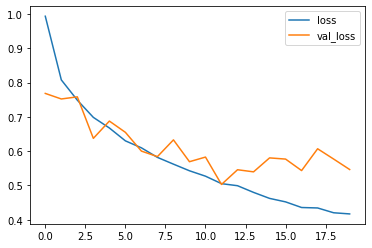

In [ ]:
# plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

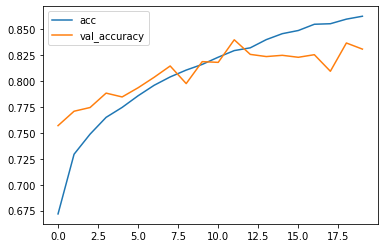

In [ ]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

313/313 [==============================] - 2s 5ms/step
Confusion matrix, without normalization
[[933   7  19   2   8   0   3   9  12   7]
 [ 15 926   1   1   1   0   3   1   3  49]
 [ 77   2 636  40  80  30  99  26   5   5]
 [ 36   7  39 638  48  75  94  49   4  10]
 [ 17   1  17  19 842  14  59  30   1   0]
 [  9   4  22  97  41 746  30  48   2   1]
 [  5   2  11  19  11   3 938   6   2   3]
 [ 12   0   5  20  33  14  11 904   0   1]
 [102  17   9   2   3   0  11   5 826  25]
 [ 26  35   3   4   0   1   0   6   4 921]]


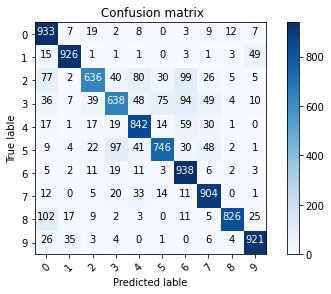

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plt_CM(cm, classes,
           normalize = False,
           title = ' Confusion matrix',
           cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Confusion matrix, with normalization')
  else:
    print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = (np.arange(len(classes)))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j, i, format(cm[i,j], fmt),
              horizontalalignment = 'center',
              color = 'white' if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True lable")
    plt.xlabel("Predicted lable")
    plt.show()

ptest = model.predict(xtest).argmax(axis = 1)
cm = confusion_matrix(ytest, ptest)
plt_CM(cm, list(range(10)))

Text(0.5, 1.0, 'True label is: bird and predicted one is: frog')

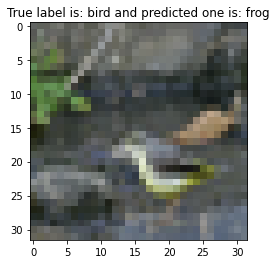

In [ ]:
# lable mapping....
labels = """
airplan
automobile
bird
cat
deer
dog
frog
horse
ship
truck""".split()

#Some misclassifid examples
misclassified_idx = np.where(ptest != ytest)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(xtest[i],cmap = 'gray')
plt.title('True label is: %s and predicted one is: %s' % (labels[ytest[i]], labels[ptest[i]]))

In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_62 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_60 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_63 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_61 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_64 (Conv2D)          (None, 32, 32, 64)        3692